In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
train_df=pd.read_csv("/content/drive/MyDrive/ML_Artivatic_dataset/train_indessa.csv")
test_df = pd.read_csv("/content/drive/MyDrive/ML_Artivatic_dataset/test_indessa.csv")

## **EDA**

In [3]:
train_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [4]:
test_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [5]:
#Dropping member_id feature
train_df.drop(['member_id'], axis=1, inplace=True)
test_df.drop(['member_id'], axis=1, inplace=True)

In [6]:
print(train_df.shape)
print(test_df.shape)

(532428, 44)
(354951, 43)


In [7]:
print(set(train_df.columns))
print(set(test_df.columns))
print(set(train_df.columns)-set(test_df.columns))

{'collections_12_mths_ex_med', 'loan_amnt', 'mths_since_last_major_derog', 'zip_code', 'mths_since_last_record', 'addr_state', 'initial_list_status', 'verification_status', 'emp_length', 'pymnt_plan', 'collection_recovery_fee', 'mths_since_last_delinq', 'pub_rec', 'application_type', 'revol_bal', 'revol_util', 'verification_status_joint', 'funded_amnt_inv', 'sub_grade', 'term', 'total_rec_late_fee', 'tot_cur_bal', 'desc', 'int_rate', 'loan_status', 'inq_last_6mths', 'grade', 'total_acc', 'dti', 'home_ownership', 'total_rec_int', 'acc_now_delinq', 'annual_inc', 'tot_coll_amt', 'recoveries', 'emp_title', 'total_rev_hi_lim', 'funded_amnt', 'title', 'batch_enrolled', 'last_week_pay', 'delinq_2yrs', 'purpose', 'open_acc'}
{'collections_12_mths_ex_med', 'loan_amnt', 'mths_since_last_major_derog', 'zip_code', 'mths_since_last_record', 'addr_state', 'initial_list_status', 'verification_status', 'emp_length', 'pymnt_plan', 'collection_recovery_fee', 'mths_since_last_delinq', 'pub_rec', 'applica

In [8]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    532428 non-null  int64  
 1   funded_amnt                  532428 non-null  int64  
 2   funded_amnt_inv              532428 non-null  float64
 3   term                         532428 non-null  object 
 4   batch_enrolled               447279 non-null  object 
 5   int_rate                     532428 non-null  float64
 6   grade                        532428 non-null  object 
 7   sub_grade                    532428 non-null  object 
 8   emp_title                    501595 non-null  object 
 9   emp_length                   505537 non-null  object 
 10  home_ownership               532428 non-null  object 
 11  annual_inc                   532425 non-null  float64
 12  verification_status          532428 non-null  object 
 13 

In [9]:
for column in train_df.columns:
  print(column)
  print(train_df[column].value_counts())
  print("******************************")

loan_amnt
10000    37175
12000    30126
15000    28420
20000    28196
35000    21728
         ...  
925          1
32050        1
34600        1
900          1
725          1
Name: loan_amnt, Length: 1370, dtype: int64
******************************
funded_amnt
10000    37118
12000    30069
15000    28345
20000    28085
35000    21650
         ...  
900          1
32050        1
34600        1
725          1
750          1
Name: funded_amnt, Length: 1370, dtype: int64
******************************
funded_amnt_inv
10000.000000    33676
12000.000000    26981
15000.000000    25025
20000.000000    24198
35000.000000    17671
                ...  
13470.755149        1
3651.255581         1
7093.836559         1
19550.020606        1
684.135130          1
Name: funded_amnt_inv, Length: 6442, dtype: int64
******************************
term
36 months    372793
60 months    159635
Name: term, dtype: int64
******************************
batch_enrolled
              106079
BAT2252229     18791

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


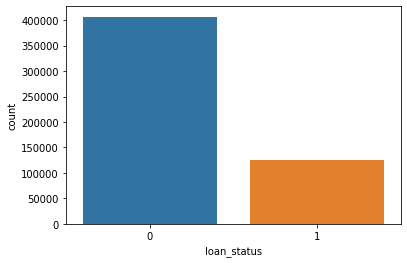

In [10]:
sns.countplot(train_df.loan_status)

There's imbalance in dataset which we will handle later


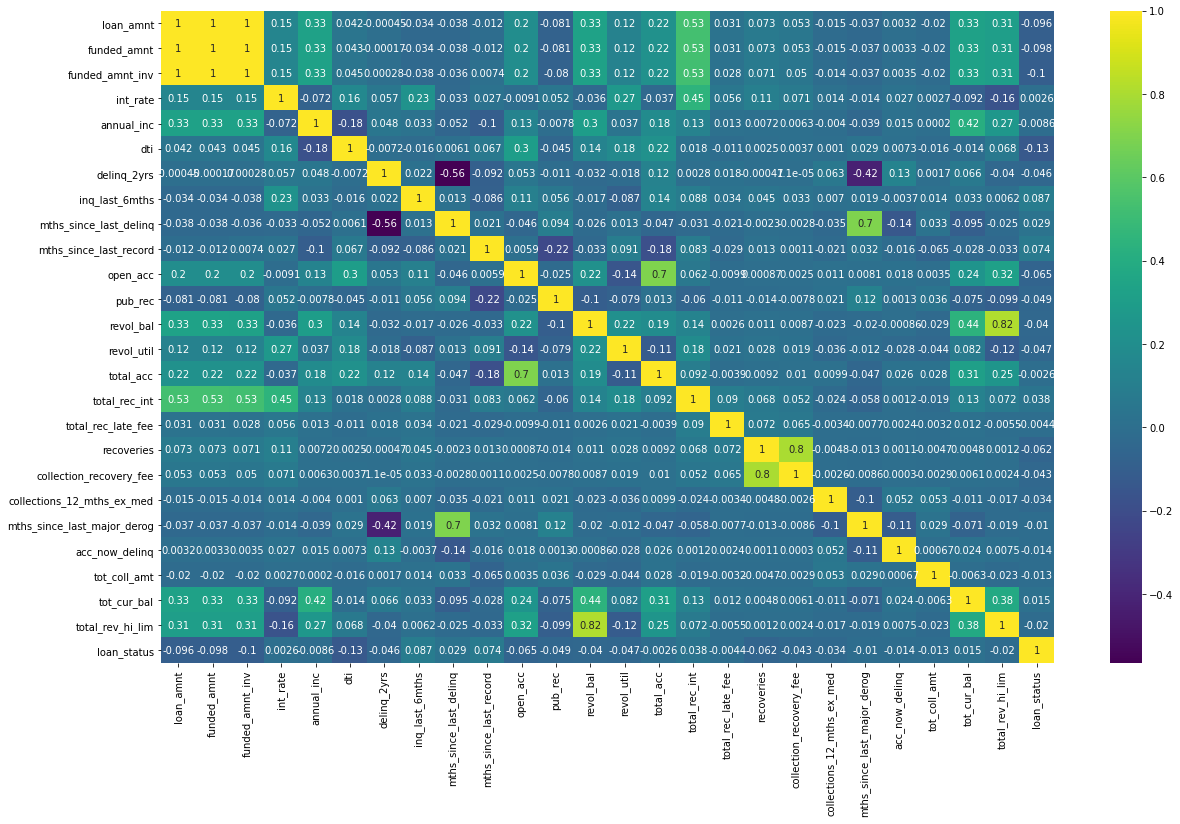

In [11]:
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.corr(), annot=True, cmap='viridis')

In [12]:
train_df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,406601.0,15206.679337,8499.937514,500.0,8700.0,14000.0,20000.0,35000.0
1,125827.0,13306.413965,8049.663290,500.0,7125.0,12000.0,18000.0,35000.0


**Grade**

[Text(0, 0, 'A1'),
 Text(0, 0, 'A2'),
 Text(0, 0, 'A3'),
 Text(0, 0, 'A4'),
 Text(0, 0, 'A5'),
 Text(0, 0, 'B1'),
 Text(0, 0, 'B2'),
 Text(0, 0, 'B3'),
 Text(0, 0, 'B4'),
 Text(0, 0, 'B5'),
 Text(0, 0, 'C1'),
 Text(0, 0, 'C2'),
 Text(0, 0, 'C3'),
 Text(0, 0, 'C4'),
 Text(0, 0, 'C5'),
 Text(0, 0, 'D1'),
 Text(0, 0, 'D2'),
 Text(0, 0, 'D3'),
 Text(0, 0, 'D4'),
 Text(0, 0, 'D5'),
 Text(0, 0, 'E1'),
 Text(0, 0, 'E2'),
 Text(0, 0, 'E3'),
 Text(0, 0, 'E4'),
 Text(0, 0, 'E5'),
 Text(0, 0, 'F1'),
 Text(0, 0, 'F2'),
 Text(0, 0, 'F3'),
 Text(0, 0, 'F4'),
 Text(0, 0, 'F5'),
 Text(0, 0, 'G1'),
 Text(0, 0, 'G2'),
 Text(0, 0, 'G3'),
 Text(0, 0, 'G4'),
 Text(0, 0, 'G5')]

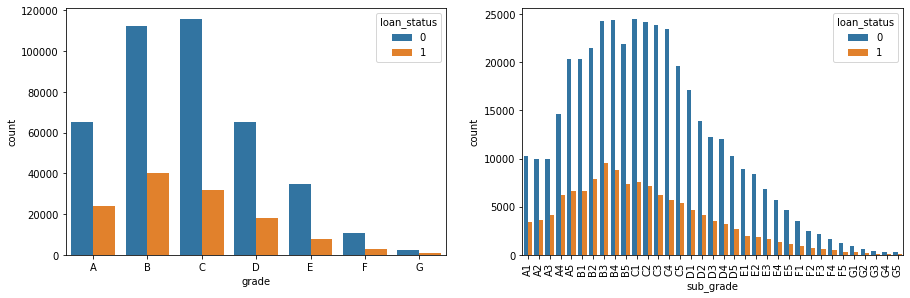

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(train_df.grade.unique().tolist())
sns.countplot(x='grade', data=train_df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(train_df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=train_df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Now observing percentage distribution amongst grade acc. to loan status 

In [14]:
print("Percentage distribution amongst grade acc. to loan status \n")
grade_status=(train_df.groupby(by=['grade','loan_status'])['grade'].count())
grade = train_df.groupby(['grade'])['loan_status'].count()
grade_status.div(grade, level='grade') * 100

Percentage distribution amongst grade acc. to loan status 



grade  loan_status
A      0              73.112101
       1              26.887899
B      0              73.672182
       1              26.327818
C      0              78.359175
       1              21.640825
D      0              78.283294
       1              21.716706
E      0              81.310742
       1              18.689258
F      0              79.082887
       1              20.917113
G      0              76.404843
       1              23.595157
dtype: float64

Percentage distribution is quite similar, with most difference in grade 'E'

**Home ownership**

In [15]:
train_df.home_ownership.value_counts()

MORTGAGE    265940
RENT        213668
OWN          52664
OTHER          117
NONE            36
ANY              3
Name: home_ownership, dtype: int64

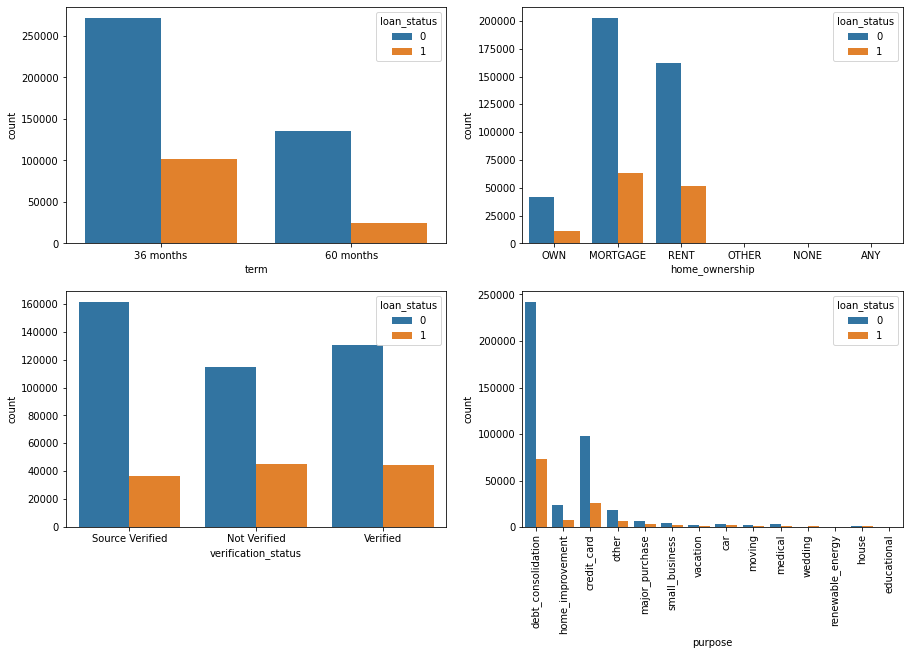

In [16]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=train_df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=train_df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=train_df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=train_df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

**Interest Rate distribution**

Text(0.5, 0, 'int_rate')

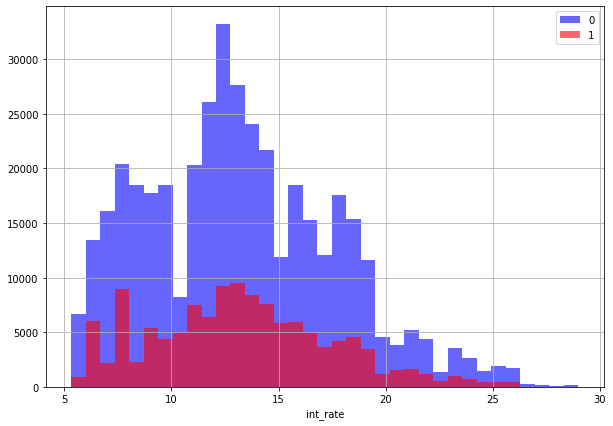

In [17]:
plt.figure(figsize=(10,7))

train_df[train_df["loan_status"] == 0]["int_rate"].hist(bins=35, color='blue', label='0', alpha=0.6)
train_df[train_df["loan_status"] == 1]["int_rate"].hist(bins=35, color='red', label='1', alpha=0.6)
plt.legend()
plt.xlabel("int_rate")



**emp_title and emp_length**

Merging different em_title into one

In [18]:
train_df['emp_title'] = train_df.emp_title.str.lower()

In [19]:
def manager(string):
    if type(string) is str:
        return 'manager' if 'manager' in string else string

def president(string):
    if type(string) is str:
        return 'president' if 'president' in string else string
    
def nurse(string):
    if type(string) is str:
        return 'nurse' if 'nurse' in string else string
    
def driver(string):
    if type(string) is str:
        return 'driver' if 'driver' in string else string
    
def assistant(string):
    if type(string) is str:
        return 'assistant' if 'assistant' in string else string

def engineer(string):
    if type(string) is str:
        return 'engineer' if 'engineer' in string else string 

def teacher(string):
    if type(string) is str:
        return 'teacher' if 'teacher' in string else string    

functions = [manager, president, nurse, driver, assistant, engineer, teacher]
for func in functions:
    train_df['emp_title'] = train_df.emp_title.apply(func)

In [20]:
train_df.emp_title.value_counts()[:30]

manager              65004
engineer             12969
teacher              12229
assistant            12205
driver                9276
nurse                 8956
president             6007
owner                 5305
supervisor            4502
sales                 3923
rn                    3656
director              2159
police officer        1638
attorney              1497
accountant            1469
technician            1407
mechanic              1256
analyst               1092
server                1059
customer service       982
paralegal              924
electrician            915
consultant             878
operator               875
foreman                865
controller             814
account executive      807
administrator          792
machine operator       767
clerk                  725
Name: emp_title, dtype: int64

Text(0.5, 1.0, 'Top jobs who afforded a loan')

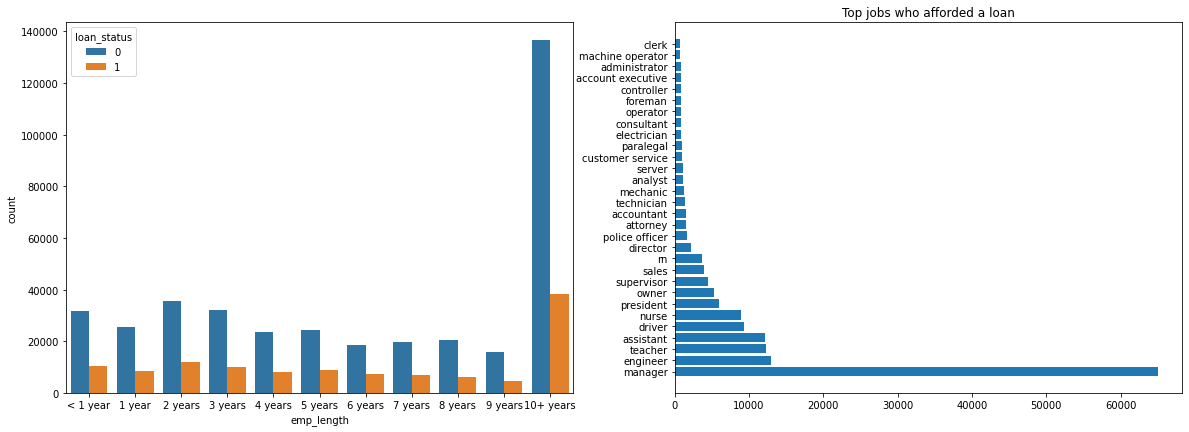

In [21]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(x='emp_length', data=train_df, hue='loan_status', order=order)

plt.subplot(2, 2, 2)
plt.barh(train_df.emp_title.value_counts()[:30].index, train_df.emp_title.value_counts()[:30])
plt.title("Top jobs who afforded a loan")

Percentage distribution amongst emp_length acc. to loan status

In [22]:
print("Percentage distribution amongst emp_length acc. to loan status \n")
emplength_status=(train_df.groupby(by=['emp_length','loan_status'])['emp_length'].count())
emp_length = train_df.groupby(['emp_length'])['loan_status'].count()
emplength_status.div(emp_length, level='emp_length') * 100

Percentage distribution amongst emp_length acc. to loan status 



emp_length  loan_status
1 year      0              75.048243
            1              24.951757
10+ years   0              78.058308
            1              21.941692
2 years     0              74.966156
            1              25.033844
3 years     0              75.817427
            1              24.182573
4 years     0              74.225009
            1              25.774991
5 years     0              73.278831
            1              26.721169
6 years     0              71.881434
            1              28.118566
7 years     0              73.995502
            1              26.004498
8 years     0              77.419355
            1              22.580645
9 years     0              77.054331
            1              22.945669
< 1 year    0              75.402930
            1              24.597070
dtype: float64

Percentage distribution looks similar across emp_length,So we will drop it.

In [23]:
train_df.drop('emp_length', axis=1, inplace=True)
test_df.drop('emp_length', axis=1, inplace=True)

**Title**

In [24]:
train_df['title'] = train_df.title.str.lower()

In [25]:
train_df.title.value_counts()[:30]

debt consolidation           262322
credit card refinancing       98818
home improvement              25665
other                         19106
major purchase                 7392
consolidation                  4828
medical expenses               4057
business                       4014
car financing                  3353
debt consolidation loan        2939
vacation                       2387
moving and relocation          2358
credit card consolidation      2224
personal loan                  2059
credit card payoff             1559
consolidation loan             1542
credit card refinance          1528
home buying                    1403
consolidate                    1311
personal                       1293
loan                            991
payoff                          924
debt                            871
credit cards                    856
freedom                         787
credit card                     754
my loan                         734
credit card loan            

Plotting 10 main reasons for loan

Text(0.5, 1.0, '10 main reasons for loan')

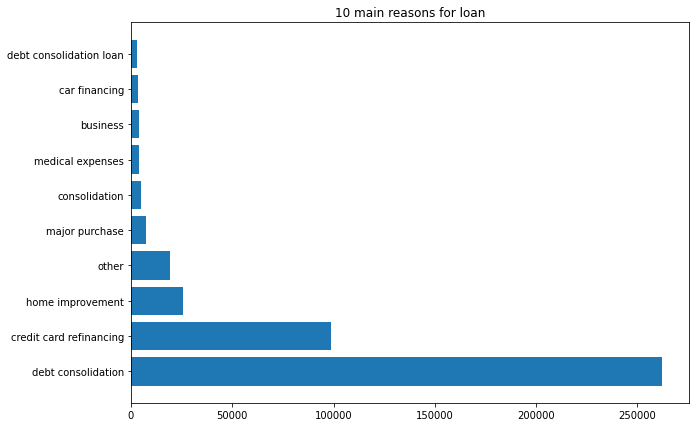

In [26]:
plt.figure(figsize=(10, 7))
plt.barh(train_df.title.value_counts()[:10].index, train_df.title.value_counts()[:10])
plt.title("10 main reasons for loan")

**dti, open_acc, revol_bal, revol_util, & total_acc**

Text(0.5, 0, 'total_acc')

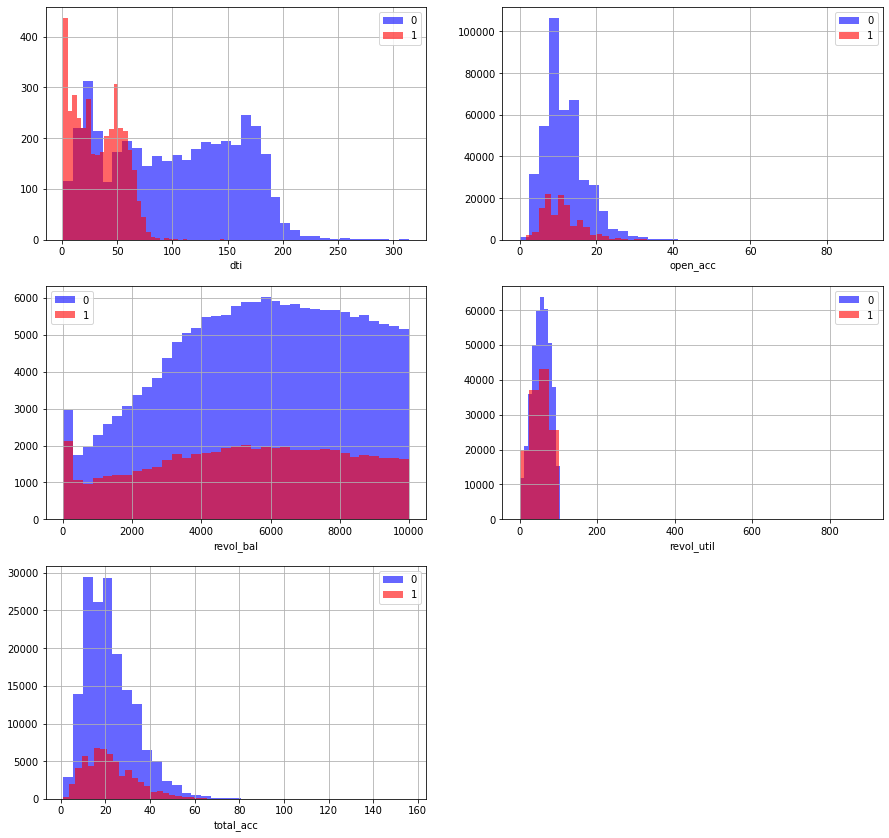

In [27]:
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
train_df[train_df["loan_status"] == 0]["dti"].value_counts().hist(bins=35, color='blue', 
                                                                     label='0', alpha=0.6)
train_df[train_df["loan_status"] == 1]["dti"].value_counts().hist(bins=35, color='red', 
                                                                      label='1', alpha=0.6)
plt.legend()
plt.xlabel("dti")

plt.subplot(6, 2, 2)
train_df[train_df["loan_status"] == 0]["open_acc"].hist(bins=35, color='blue', label='0', alpha=0.6)
train_df[train_df["loan_status"] == 1]["open_acc"].hist(bins=35, color='red', label='1', alpha=0.6)
plt.legend()
plt.xlabel("open_acc")

plt.subplot(6, 2, 3)
df = train_df[(train_df.revol_bal <= 10000)]
df[df["loan_status"] == 0]["revol_bal"].hist(bins=35, color='blue', label='0', alpha=0.6)
df[df["loan_status"] == 1]["revol_bal"].hist(bins=35, color='red', label='1', alpha=0.6)
plt.legend()
plt.xlabel("revol_bal")

plt.subplot(6, 2, 4)
train_df[train_df["loan_status"] == 0]["revol_util"].hist(bins=35, color='blue', label='0', alpha=0.6)
train_df[train_df["loan_status"] == 1]["revol_util"].hist(bins=35, color='red', label='1', alpha=0.6)
plt.legend()
plt.xlabel("revol_util")

plt.subplot(6, 2, 5)
df = train_df[(train_df.revol_bal <= 10000)]
df[df["loan_status"] == 0]["total_acc"].hist(bins=35, color='blue', label='0', alpha=0.6)
df[df["loan_status"] == 1]["total_acc"].hist(bins=35, color='red', label='1', alpha=0.6)
plt.legend()
plt.xlabel("total_acc")

**pub_rec, initial_list_status, application_type**


In [28]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

train_df['pub_rec'] = train_df.pub_rec.apply(pub_rec)

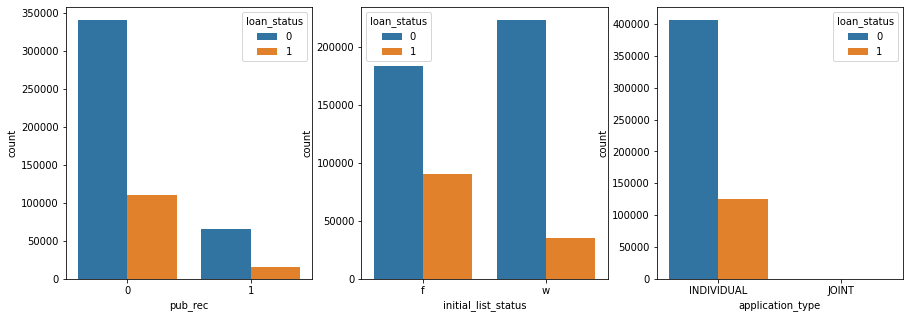

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.countplot(x='pub_rec', data=train_df, hue='loan_status')

plt.subplot(1, 3, 2)
sns.countplot(x='initial_list_status', data=train_df, hue='loan_status')

plt.subplot(1, 3, 3)
sns.countplot(x='application_type', data=train_df, hue='loan_status')

**numeric features correlation with the target variable**

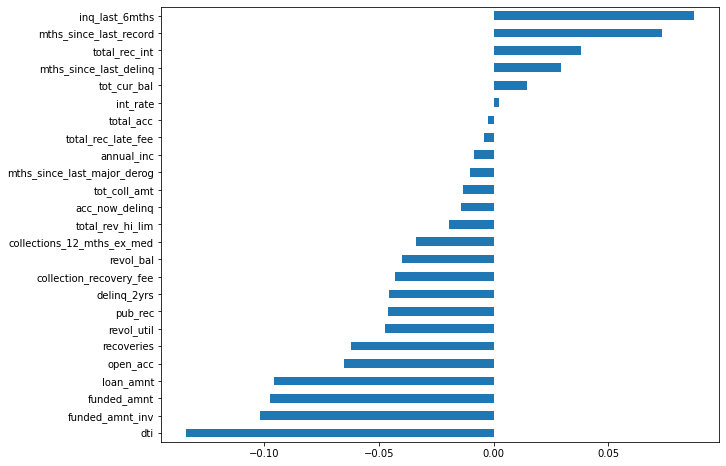

In [30]:
plt.figure(figsize=(10, 8))
train_df.corr()['loan_status'].drop('loan_status').sort_values().plot(kind='barh')

# **Data PreProcessing**

In [31]:
train_df.title.value_counts().head()

debt consolidation         262322
credit card refinancing     98818
home improvement            25665
other                       19106
major purchase               7392
Name: title, dtype: int64

In [32]:
train_df.purpose.value_counts().head()

debt_consolidation    314989
credit_card           123670
home_improvement       31087
other                  25652
major_purchase         10284
Name: purpose, dtype: int64

title and purpose have almost same distribution and meaning

In [33]:
train_df.drop('title', axis=1, inplace=True)
test_df.drop('title', axis=1, inplace=True)

since sub-grade is sub category of grade. However, they might be highly correlated,if I remove the main category column each subcategory in the subcategory column will be treated individually and If I remove the subcategory column I would lose on some information.Grade may provide simpler model but sub-grade has too many levels to be interpreted. SO, I'll drop sub_grade.

In [34]:
train_df.drop('sub_grade', axis=1, inplace=True)
test_df.drop('sub_grade', axis=1, inplace=True)

In [35]:
print(train_df.shape)
print(test_df.shape)

(532428, 41)
(354951, 40)


Dropping duplicates

In [36]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [37]:
print(train_df.shape)
print(test_df.shape)

(532428, 41)
(354951, 40)


In [38]:
def nunique_dtypes(df):
  return pd.merge(pd.DataFrame(df.nunique()), pd.DataFrame(df.dtypes), left_index=True, right_index=True,suffixes=('_nunique', '_dtype'))

In [39]:
nunique_dtypes(train_df).join(train_df.head().T)

,0_nunique,0_dtype,0,1,2,3,4
loan_amnt,1370,int64,14350,4800,10000,15000,16000
funded_amnt,1370,int64,14350,4800,10000,15000,16000
funded_amnt_inv,6442,float64,14350,4800,10000,15000,16000
term,2,object,36 months,36 months,36 months,36 months,36 months
batch_enrolled,104,object,,BAT1586599,BAT1586599,BAT4808022,BAT2833642
int_rate,535,float64,19.19,10.99,7.26,19.72,10.64
grade,7,object,E,B,A,D,B
emp_title,145843,object,clerk,human resources specialist,driver,us office of personnel management,lausd-hollywood high school
home_ownership,6,object,OWN,MORTGAGE,OWN,RENT,RENT
annual_inc,33988,float64,28700,65000,45000,105000,52000


Replacing funded amount and funded amount by investor by percentages for better interpretation.

In [40]:
train_df.rename(columns = {'funded_amnt':'funded_amnt(%)'}, inplace = True)
train_df['funded_amnt(%)']=(train_df['funded_amnt(%)']/train_df['loan_amnt'])*100

train_df.rename(columns = {'funded_amnt_inv':'funded_amnt_inv(%)'}, inplace = True)
train_df['funded_amnt_inv(%)']=(train_df['funded_amnt_inv(%)']/train_df['loan_amnt'])*100


In [41]:
test_df.rename(columns = {'funded_amnt':'funded_amnt(%)'}, inplace = True)
test_df['funded_amnt(%)']=(test_df['funded_amnt(%)']/test_df['loan_amnt'])*100

test_df.rename(columns = {'funded_amnt_inv':'funded_amnt_inv(%)'}, inplace = True)
test_df['funded_amnt_inv(%)']=(test_df['funded_amnt_inv(%)']/train_df['loan_amnt'])*100


Converting term and last_week_pay to continous variables.

In [42]:
train_df['term']=(train_df['term'].str.replace(" months","")).astype('float').astype('Int64')
test_df['term']=(test_df['term'].str.replace(" months","")).astype('float').astype('Int64')

In [43]:
train_df['last_week_pay']=(train_df['last_week_pay'].str.replace("th week",""))
train_df['last_week_pay']=(train_df['last_week_pay'].replace("NA", np.nan))
train_df['last_week_pay']=(train_df['last_week_pay']).astype('float').astype('Int64')

test_df['last_week_pay']=(test_df['last_week_pay'].str.replace("th week",""))
test_df['last_week_pay']=(test_df['last_week_pay'].replace("NA", np.nan))
test_df['last_week_pay']=(test_df['last_week_pay']).astype('float').astype('Int64')

In [44]:
train_df.head()

,loan_amnt,funded_amnt(%),funded_amnt_inv(%),term,batch_enrolled,int_rate,grade,emp_title,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,100.0,100.0,36,,19.19,E,clerk,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26,0.0,0.0,28699.0,30800.0,0
1,4800,100.0,100.0,36,BAT1586599,10.99,B,human resources specialist,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9,0.0,0.0,9974.0,32900.0,0
2,10000,100.0,100.0,36,BAT1586599,7.26,A,driver,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9,0.0,65.0,38295.0,34900.0,0
3,15000,100.0,100.0,36,BAT4808022,19.72,D,us office of personnel management,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135,0.0,0.0,55564.0,24700.0,0
4,16000,100.0,100.0,36,BAT2833642,10.64,B,lausd-hollywood high school,RENT,52000.0,Verified,n,NaN,credit_card,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96,0.0,0.0,47159.0,47033.0,0


Since ZIP Codes are encoded in such way that if difference in starting digits of ZIP are less, they would be nearer to wach other.
https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/ZIP_Code_zones.svg/1024px-ZIP_Code_zones.svg.png
So, I converted ZIP Code to continous variable

In [45]:
train_df['zip_code']=(train_df['zip_code'].str.replace("xx","")).astype('float').astype('Int64')
test_df['zip_code']=(test_df['zip_code'].str.replace("xx","")).astype('float').astype('Int64')

In [46]:
train_df['batch_enrolled'].value_counts()

              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64

In [47]:
train_df['batch_enrolled']=((train_df['batch_enrolled']).str.strip()).replace('', np.nan)
test_df['batch_enrolled']=((test_df['batch_enrolled']).str.strip()).replace('', np.nan)

# **Null value computation**

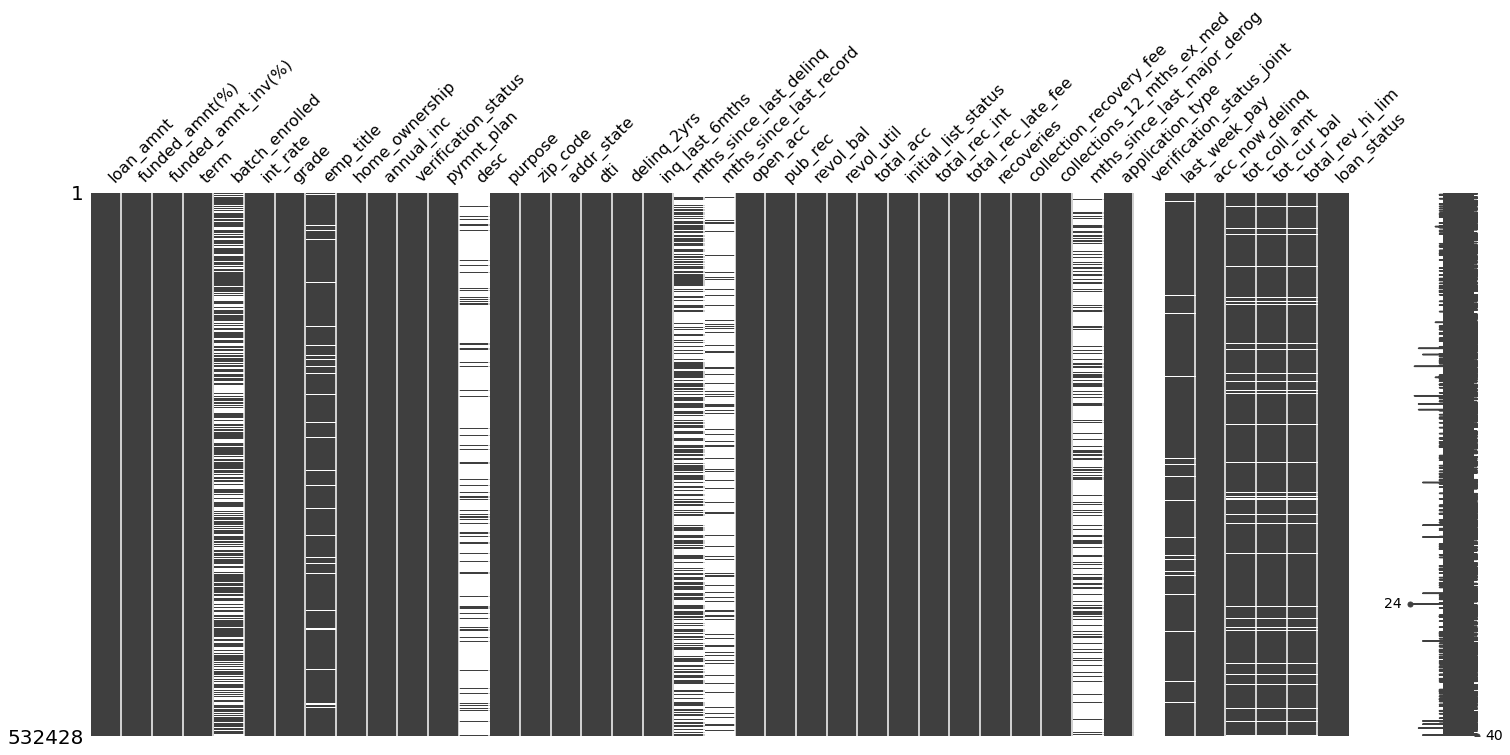

In [48]:
msno.matrix(train_df)

In [49]:
def compute_null(df):  
  missing_df=pd.DataFrame()
  missing_df['missing_count']= df.isnull().sum()
  missing_df['missing_percent(%)']=(missing_df['missing_count']/df.shape[0])*100
  missing_df=missing_df.join(nunique_dtypes(df))
  missing_df=missing_df[missing_df['missing_percent(%)']!=0]
  return (missing_df.sort_values(by=['missing_percent(%)'],ascending=False))

In [50]:
print("***********Train_df************")
compute_null(train_df)

***********Train_df************


,missing_count,missing_percent(%),0_nunique,0_dtype
verification_status_joint,532123,99.942715,3,object
desc,456829,85.801085,70638,object
mths_since_last_record,450305,84.575755,122,float64
mths_since_last_major_derog,399448,75.023853,162,float64
mths_since_last_delinq,272554,51.190771,147,float64
batch_enrolled,191228,35.916218,103,object
tot_cur_bal,42004,7.889142,251640,float64
tot_coll_amt,42004,7.889142,8081,float64
total_rev_hi_lim,42004,7.889142,14697,float64
emp_title,30833,5.791018,145843,object


In [51]:
print("***********Test_df*************")
compute_null(test_df)

***********Test_df*************


,missing_count,missing_percent(%),0_nunique,0_dtype
verification_status_joint,354745,99.941964,3,object
desc,304770,85.862556,47101,object
mths_since_last_record,300021,84.524625,122,float64
mths_since_last_major_derog,266228,75.004156,162,float64
mths_since_last_delinq,181758,51.206505,135,float64
batch_enrolled,173607,48.910131,103,object
tot_cur_bal,28272,7.965043,196438,float64
tot_coll_amt,28272,7.965043,6610,float64
total_rev_hi_lim,28272,7.965043,10841,float64
emp_title,20629,5.811788,135102,object


Dropping columns with greater than 30 percent null values

In [52]:
more_than_30_null_columns=compute_null(train_df)[(compute_null(train_df)['missing_percent(%)'])>30].index

In [53]:
train_df.drop(more_than_30_null_columns, axis=1, inplace=True)
test_df.drop(more_than_30_null_columns, axis=1, inplace=True)

In [54]:
print("***********Train_df************")
compute_null(train_df)

***********Train_df************


,missing_count,missing_percent(%),0_nunique,0_dtype
tot_coll_amt,42004,7.889142,8081,float64
tot_cur_bal,42004,7.889142,251640,float64
total_rev_hi_lim,42004,7.889142,14697,float64
emp_title,30833,5.791018,145843,object
last_week_pay,10614,1.993509,97,Int64
revol_util,287,0.053904,1265,float64
collections_12_mths_ex_med,95,0.017843,9,float64
delinq_2yrs,16,0.003005,26,float64
inq_last_6mths,16,0.003005,23,float64
open_acc,16,0.003005,73,float64


In [55]:
# less_1_percent=list(compute_null(train_df)[(compute_null(train_df)['missing_percent(%)']<1)].index)
# train_df=train_df.dropna(subset=less_1_percent)
# train_df.reset_index(inplace=True,drop=True)
# test_df=test_df.dropna(subset=less_1_percent)
# test_df.reset_index(inplace=True,drop=True)

In [56]:
numerical_features=(list(train_df._get_numeric_data().columns))
categorical_features=list(set(train_df.columns)-set(numerical_features))

In [57]:
numerical_features.remove('loan_status')

In [58]:
nunique_dtypes(train_df[categorical_features])

,0_nunique,0_dtype
grade,7,object
application_type,2,object
home_ownership,6,object
addr_state,51,object
initial_list_status,2,object
verification_status,3,object
pymnt_plan,2,object
purpose,14,object
emp_title,145843,object


emp_title have too many unique values for dummy variable encoding

In [59]:
train_df.drop('emp_title', axis=1, inplace=True)
test_df.drop('emp_title', axis=1, inplace=True)

In [60]:
numerical_features=(list(train_df._get_numeric_data().columns))
categorical_features=list(set(train_df.columns)-set(numerical_features))

In [61]:
missing_numerical_features=list(compute_null(train_df)[(compute_null(train_df)['0_dtype']!='object')].index)
missing_categorical_features=list(set(compute_null(train_df).index)-set(missing_numerical_features))

In [62]:
print("missing_numerical_features : " + str(missing_numerical_features))
print("missing_categorical_features : " + str(missing_categorical_features))

missing_numerical_features : ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'last_week_pay', 'revol_util', 'collections_12_mths_ex_med', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'total_acc', 'acc_now_delinq', 'annual_inc']
missing_categorical_features : []


In [63]:
missing_numerical_features_test=list(compute_null(test_df)[(compute_null(test_df)['0_dtype']!='object')].index)
missing_categorical_features_test=list(set(compute_null(test_df).index)-set(missing_numerical_features_test))

In [64]:
print("missing_numerical_features : " + str(missing_numerical_features_test))
print("missing_categorical_features : " + str(missing_categorical_features_test))

missing_numerical_features : ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'last_week_pay', 'revol_util', 'collections_12_mths_ex_med', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'annual_inc']
missing_categorical_features : []


In [65]:
mod_train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)
mod_test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)

Replacing null values by median

In [66]:
for feature in missing_numerical_features:
  mod_train_df[feature]=mod_train_df[feature].replace(np.NaN,mod_train_df[feature].median())

for feature in missing_numerical_features_test:
  mod_test_df[feature]=mod_test_df[feature].replace(np.NaN,mod_test_df[feature].median())

In [67]:
compute_null(mod_train_df)

,missing_count,missing_percent(%),0_nunique,0_dtype


In [68]:
compute_null(mod_test_df)

,missing_count,missing_percent(%),0_nunique,0_dtype


# **Resampling for data balance**

In [69]:
from sklearn.utils import resample

In [70]:
df_majority = mod_train_df[mod_train_df.loan_status==0]
df_minority = mod_train_df[mod_train_df.loan_status==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=406395,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.loan_status.value_counts()

0    406601
1    406395
Name: loan_status, dtype: int64

In [71]:
cols=list(df_upsampled.columns)
cols.remove("loan_status")

In [72]:
X_unscaled=(df_upsampled[cols]).astype('float')
Y=df_upsampled['loan_status']

In [73]:
set(X_unscaled.columns)-set(mod_test_df.columns)

{'home_ownership_MORTGAGE'}

In [74]:
mod_test_df['home_ownership_MORTGAGE']=0

# **Normalising Data**

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
#Scalling of data
sc = StandardScaler()
X = sc.fit_transform(X_unscaled)
mod_test_df = sc.fit_transform(mod_test_df)

In [77]:
print(X.shape)
print(Y.shape)
print(mod_test_df.shape)

(812996, 104)
(812996,)
(354951, 104)


## **PCA**

In [78]:
from sklearn.decomposition import PCA

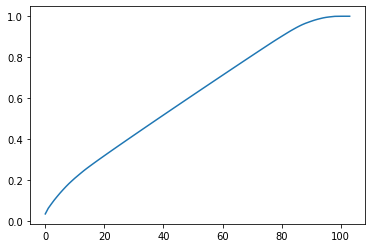

In [79]:
#checking explained variance of scaled data
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

# **Spliting dataset**

In [80]:
#Splitting data into train and test as 4:1
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# **Model Building**

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier 

In [82]:
####******** Building Machine learning models *******#####

# fuction to check the performance of the regression model using kfold cross validation on explained variance
# also checking the score with the training and test dataset
def predictions(classification_model, X_train, y_train, X_test, y_test):
    classification_model.fit(X_train, y_train)
    # here we are taking the k fold parameter as 10. It will divide the whole dataset into 10 equal parts and check performance taking each part one time as test data and other parts as training data
    # y_pred = cross_val_predict(estimator=classification_model, X = X_train, y = y_train, cv = 10)
    y_pred = classification_model.predict(X_train)
    y_pred2 = classification_model.predict(X_test)
    report_lr = precision_recall_fscore_support(y_train, y_pred, average='binary')
    report_lr2 = precision_recall_fscore_support(y_test, y_pred2, average='binary')
    print("training metrics")
    print("ROC AUC SCORE =" + str(roc_auc_score(y_train, y_pred)))
    print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_train, y_pred)))
    print("testing metrics")
    print("ROC AUC SCORE =" + str(roc_auc_score(y_test, y_pred2)))
    print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr2[0], report_lr2[1], report_lr2[2], accuracy_score(y_test, y_pred2)))

In [83]:
# Building models with metrics as ROC AUC SCORE
models=[RandomForestClassifier(random_state=1),XGBClassifier(random_state=1),LGBMClassifier()]
for model in models:
    print (model)
    predictions(model, X_train, y_train, X_test, y_test)
    print("****************************************")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
training metrics
ROC AUC SCORE =1.0

precision = 1.0000, recall = 1.0000, F1 = 1.0000, accuracy = 1.0000

testing metrics
ROC AUC SCORE =0.9612307237728861

precision = 0.9702, recall = 0.9518, F1 = 0.9609, accuracy = 0.9612

****************************************
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_de

RandomForestClassifier performs best but is overfitting

In [84]:
##        Hyperparameter tuning             #

# #tuning Random Forest for dataset #

# from sklearn.model_selection import GridSearchCV
# # Random Forest hyperparameter tuning
# classifier = RandomForestClassifier(random_state=1)
# params = [{'n_estimators' : [100,150],'max_features':['auto', 'sqrt',],
#            'min_samples_split':[2,4],'max_depth':[30,35],'min_samples_leaf':[2,3],
#            'random_state' :[1]}]
# grid_search = GridSearchCV(estimator=classifier, param_grid=params,cv = 2, n_jobs=-1, verbose=100)
# grid_search = grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

In [85]:
estimator=RandomForestClassifier(max_depth=35,max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=100, random_state=1)

In [86]:
predictions(estimator, X_train, y_train, X_test, y_test)

training metrics
ROC AUC SCORE =0.993173730668993

precision = 0.9955, recall = 0.9908, F1 = 0.9932, accuracy = 0.9932

testing metrics
ROC AUC SCORE =0.9425701973096439

precision = 0.9493, recall = 0.9353, F1 = 0.9422, accuracy = 0.9426



In [87]:
y_pred=  estimator.predict(mod_test_df)

In [88]:
set(y_pred)

{0, 1}

In [93]:
print(np.unique(y_pred, return_counts=True))

(array([0, 1]), array([308693,  46258]))


In [89]:
test_df = pd.read_csv("/content/drive/MyDrive/ML_Artivatic_dataset/test_indessa.csv")

In [90]:
print(test_df.shape)
print(y_pred.shape)

(354951, 44)
(354951,)


In [91]:
test_df['loan_status']=y_pred

In [94]:
test_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0,0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0,0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0,0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0,0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0,0


In [95]:
(test_df[['member_id','loan_status']]).to_csv("loan_submission.csv",index=False)